In [5]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

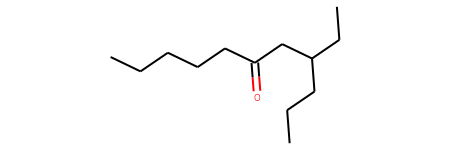

In [7]:
Chem.MolFromSmiles("CCC(CCC)CC(=O)CCCCC")

In [15]:
m = Chem.MolFromSmiles("c1ccccc1")
print(m)

In [12]:
m.GetNumAtoms()

6

In [17]:
Chem.MolToSmiles(m)

'c1ccccc1'

In [28]:
suppl = Chem.SDMolSupplier("../data/drugbank.sdf")

In [29]:
mols = [mol for mol in suppl]

RDKit WARNING: [15:04:35]  S group DAT ignored on line 2516
RDKit WARNING: [15:04:35]  S group DAT ignored on line 2516
RDKit WARNING: [15:04:35]  S group DAT ignored on line 2516
RDKit WARNING: [15:04:35]  S group DAT ignored on line 2516
RDKit WARNING: [15:04:35]  S group DAT ignored on line 15552
RDKit WARNING: [15:04:35]  S group DAT ignored on line 15552
RDKit WARNING: [15:04:35]  S group DAT ignored on line 15552
RDKit WARNING: [15:04:35]  S group DAT ignored on line 15552
RDKit ERROR: [15:04:35] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:04:35] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [15:04:35] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:04:35] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [15:04:35]  S group GEN ignored on line 102860
RDKit ERROR: [15:04:35] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [15:04:35]  Unhand

RDKit ERROR: [15:04:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [15:04:36] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:04:36] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [15:04:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [15:04:36] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [15:04:36] ERROR: Could not sanitize molecule ending on line 468852
RDKit ERROR: [15:04:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERROR: 
RDKit ERROR: [15:04:36] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [15:04:36] ERROR: Could not sanitize molecule ending on line 469201
RDKit ERROR: [15:04:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
RDKit ERROR: 
RDKit ERROR: [15:04:36] Explicit valence for atom # 53 N, 4, is greater than pe

RDKit ERROR: [15:04:37] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [15:04:37]  Unhandled CTAB feature: S group SRU on line: 754017. Molecule skipped.
RDKit ERROR: [15:04:37] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:04:37] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [15:04:37] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [15:04:38]  Unhandled CTAB feature: S group SRU on line: 1148513. Molecule skipped.
RDKit ERROR: [15:04:38] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [15:04:38] ERROR: Could not sanitize molecule ending on line 1151592


In [34]:
len([x for x in mols if not x])

70

In [36]:
cmols = [x for x in mols if x]

In [37]:
sum([mol.GetNumHeavyAtoms() for mol in cmols])

172446

In [38]:
sum([mol.GetNumAtoms() for mol in cmols])

172446

In [52]:
rinfo = m.GetRingInfo()
rinfo.AtomRings()

((0, 5, 4, 3, 2, 1),)

In [54]:
a = m.GetAtomWithIdx(0)

In [55]:
a.GetIsAromatic()

True

In [57]:
arinfs = [mol.GetRingInfo().AtomRings() for mol in cmols]
aralirings = [[mol.GetAtomWithIdx(a[0]).GetIsAromatic() for a in arinf] for arinf,mol in zip(arinfs,cmols)]

In [60]:
avg_arom = sum([len([i for i in r if i]) for r in aralirings])/len(cmols)
avg_alif = sum([len([i for i in r if not i]) for r in aralirings])/len(cmols)

In [61]:
print(avg_arom, avg_alif)

1.529957805907173 0.9368495077355837


In [69]:
Chem.MolToSmiles(m), Chem.MolToInchiKey(m)

('c1ccccc1', 'UHOVQNZJYSORNB-UHFFFAOYSA-N')